First, import needed modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [3]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [123]:
btw = pd.read_csv(f'{path}/data/btw_treat.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

In [129]:
btw.treatment_50.unique()

array([2010., 2005.,    0., 2014.])

View summary statistics

In [4]:
columns = ['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
btw.describe().to_csv(f'{path}/tables/btw/btw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
btw[columns].describe()

,Union,SPD,FDP,Linke,Grüne,Andere
count,156162.000000,156162.000000,156162.000000,156162.000000,156162.000000,156162.000000
mean,43.992053,29.873403,6.749295,7.120231,5.653731,6.611288
std,12.350357,12.480438,4.534191,8.205715,3.416691,6.707481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.966941,20.000000,3.392635,0.873362,3.205128,2.194388
50%,42.857143,29.000000,5.781418,4.105439,5.029586,4.559969
75%,51.939655,38.622662,9.049774,10.000000,7.450980,8.692144
max,100.000000,88.235294,63.273728,55.294118,54.545455,65.714286


In [54]:
btw['year'].value_counts().to_csv(f'{path}/tables/btw/btw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Split data in Erst- and Zweitstimme

In [120]:
erst = btw[btw['first_vote'] == 1]
zweit = btw[btw['second_vote'] == 1]
erst.head(10)

,AGS,GEN,year,Land,state_id,Kreis,Wahlkreis,post_1998,post_2002,post_2005,...,Andere,treatment_05,treatment_09,treatment_13,treatment_0,treatment_15,treatment_30,treatment_50,ever_treated,never_treated
0,01001000,Flensburg,1994.0,SH,1,101.0,1.0,0.0,0.0,0.0,...,1.921778,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
2,01001000,Flensburg,1998.0,SH,1,101.0,1.0,0.0,0.0,0.0,...,1.798064,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
4,01001000,Flensburg,2002.0,SH,1,101.0,1.0,1.0,0.0,0.0,...,0.399580,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
6,01001000,Flensburg,2005.0,SH,1,101.0,1.0,1.0,1.0,0.0,...,0.802172,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
8,01001000,Flensburg,2009.0,SH,1,101.0,1.0,1.0,1.0,1.0,...,1.097424,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
10,01001000,Flensburg,2013.0,SH,1,101.0,1.0,1.0,1.0,1.0,...,6.674164,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
12,01001000,Flensburg,2017.0,SH,1,101.0,1.0,1.0,1.0,1.0,...,8.532992,None,Within 15km,Within 50km,0.0,2010.0,2010.0,2010.0,Within 15km,NaN
14,01002000,Kiel,1994.0,SH,1,102.0,5.0,0.0,0.0,0.0,...,1.280413,None,Within 30km,None,0.0,0.0,2010.0,2010.0,Within 30km,NaN
16,01002000,Kiel,1998.0,SH,1,102.0,5.0,0.0,0.0,0.0,...,1.588057,None,Within 30km,None,0.0,0.0,2010.0,2010.0,Within 30km,NaN
18,01002000,Kiel,2002.0,SH,1,102.0,5.0,1.0,0.0,0.0,...,0.796048,None,Within 30km,None,0.0,0.0,2010.0,2010.0,Within 30km,NaN


Calculate average vote shares in all years by treatment variable

In [121]:
avg_dfs = {2005: 'treatment_05', 2010: 'treatment_09', 2014: 'treatment_13'}
for year, treatment in avg_dfs.items():
    avg_dfs[year] = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', treatment, 'year']].groupby([treatment, 'year'], as_index = False).mean()
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
avg_dfs[2005].head(30)

,treatment,year,Union,SPD,FDP,Linke,Grüne,Andere
0,Direct Line,1994.0,48.949182,38.176842,3.396017,3.448877,4.566414,1.462667
1,Direct Line,1998.0,41.506427,44.544730,2.808113,5.160887,3.416798,2.563046
2,Direct Line,2002.0,42.396726,42.748940,5.509336,5.098061,3.626236,0.620702
3,Direct Line,2005.0,42.207658,38.603743,4.329114,8.699713,3.238835,2.920937
4,Direct Line,2009.0,41.715057,28.958546,8.363568,12.465037,5.758605,2.739187
5,Direct Line,2013.0,48.690185,29.921986,1.847047,9.074345,4.532624,5.933813
6,Direct Line,2017.0,41.669630,26.245605,5.688532,7.633669,4.962595,13.799969
7,None,1994.0,51.980543,32.923005,3.450240,3.495087,4.977303,3.173823
8,None,1998.0,45.652765,38.427320,3.305597,4.407150,4.021871,4.185297
9,None,2002.0,48.561226,35.995949,6.039439,3.798705,4.419049,1.185632


Plot the average vote shares over years for treated and untreated municipalities

In [122]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666']
yellows = ['#ffff00', '#ffff19', '#ffff32', '#ffff4c', '#ffff66']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2']
markers = ['o', 's', 'v', 'D', '^']

for year, df in avg_dfs.items():
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
    #set x labels
    plt.setp(axes, xticks=[1994,1998,2002,2005,2009,2013,2017])
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'Average First Vote Shares \n by treatment status in {year}', fontsize=20)

    for i, treatment in enumerate(treatments):
        plot_data = df[df['treatment'] == treatment]
        # edit subplots
        axes[0, 0].set_title('Union', fontsize=12)
        axes[0, 0].set_ylabel('% Votes', fontsize=10)
        axes[0, 0].plot(plot_data['year'], plot_data['Union'], color=blacks[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[0, 0].legend(loc='lower left')
        axes[0, 0].axvline(x=year, color='red', linestyle='--')

        axes[0, 1].set_title('SPD', fontsize=12)
        axes[0, 1].set_ylabel('% Votes', fontsize=10)
        axes[0, 1].plot(plot_data['year'], plot_data['SPD'], color=reds[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[0, 1].legend(loc='lower left')
        axes[0, 1].axvline(x=year, color='red', linestyle='--')

        axes[1, 0].set_title('FDP', fontsize=12)
        axes[1, 0].set_ylabel('% Votes', fontsize=10)
        axes[1, 0].plot(plot_data['year'], plot_data['FDP'], color=yellows[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[1, 0].legend(loc='upper left')
        axes[1, 0].axvline(x=year, color='red', linestyle='--')

        axes[1, 1].set_title('Linke', fontsize=12)
        axes[1, 1].set_ylabel('% Votes', fontsize=10)
        axes[1, 1].plot(plot_data['year'], plot_data['Linke'], color=purples[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[1, 1].legend(loc='upper left')
        axes[1, 1].axvline(x=year, color='red', linestyle='--')

        axes[2, 0].set_title('Grüne', fontsize=12)
        axes[2, 0].set_ylabel('% Votes', fontsize=10)
        axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], color=greens[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[2, 0].legend(loc='upper left')
        axes[2, 0].axvline(x=year, color='red', linestyle='--')

        axes[2, 1].set_title('Andere', fontsize=12)
        axes[2, 1].set_ylabel('% Votes', fontsize=10)
        axes[2, 1].plot(plot_data['year'], plot_data['Andere'], color=greys[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[2, 1].legend(loc='upper left')
        axes[2, 1].axvline(x=year, color='red', linestyle='--')

    # Save figure
    fig.savefig(f'{path}/figures/btw/btw_{year}_vote_shares.png')
    plt.close()

Plot a map with the partys who received the largest first vote share in each year for each municipality

In [5]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
uninc = gpd.read_file(f'{path}/data/geodata/unincorporated.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')

/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [19]:
# Prepare df with election winners
btw_win = erst[['AGS', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
btw_win = btw_win[['AGS', 'year', 'winner']]
btw_win['winner'].describe()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_66613/3184358153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)


count     78081
unique        6
top       Union
freq      56655
Name: winner, dtype: object

In [20]:
# Merge win and municipalities
btw_win_plot = pd.merge(btw_win, municipalities, on='AGS')
btw_win_plot = btw_win_plot.set_geometry('geometry')

In [21]:
# add color column to df
years = btw_win_plot.year.unique().astype(int).tolist()
colors = {'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
btw_win_plot['color'] = 0
for party, color in colors.items():
    btw_win_plot['color'] = np.where(btw_win['winner'] == party, color, btw_win_plot['color'])

In [35]:
for year in years:
    plot_data = btw_win_plot[btw_win_plot['year'] == year]
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    uninc.plot(ax=ax, color='lightgray', edgecolor='cyan', hatch='+++++', lw=0.001, zorder=2)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=3)
    plot_data.plot(ax=ax, color=plot_data['color'], lw=0.01, zorder=4)
    powerlines.plot(ax=ax, column='descriptio', cmap='viridis', legend=True, lw=2, zorder=5)
    plt.title(f'Federal Election {year} \n Partys who receiced the largest first vote share', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/btw_winners_{year}.png')
    plt.close()
    print(year)

1994
1998
2002
2005
2009
2013
2017


Plot municipalities with data for office and postal ballot

In [255]:
#Prepare dfs
btw_postal = btw[btw['Vote type'] == 'postal']
btw_postal = btw_postal[['AGS', 'year']]

btw_office = btw[btw['Vote type'] == 'office']
btw_office = btw_office[['AGS', 'year']]

In [256]:
btw_postal.value_counts('year')
btw_office.value_counts('year')

year
2013.0    22306
2017.0    21962
2009.0    20593
2005.0    19299
2002.0    19204
dtype: int64

In [257]:
#office ballot
for year in years:
    btw_office_year = btw_office[btw_office['year'] == year]
    btw_office_plot = pd.merge(btw_office_year, municipalities, on='AGS')
    btw_office_plot = btw_office_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_office_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with office ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/office_votes_{year}.png')
    plt.close()

In [258]:
#postal ballot
for year in years:
    btw_postal_year = btw_postal[btw_postal['year'] == year]
    btw_postal_plot = pd.merge(btw_postal_year, municipalities, on='AGS')
    btw_postal_plot = btw_postal_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_postal_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with postal ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/postal_votes_{year}.png')
    plt.close()

Plot the development of vote types

In [269]:
vote_types = erst.groupby(['year', 'Vote type'], as_index=False).sum()

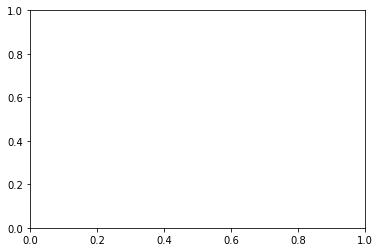

In [270]:
import seaborn as sns
fig, ax = plt.subplots()
g = sns.catplot(x='year', y='Gültig', hue='Vote type', kind='point', data=vote_types, hue_order=['office', 'postal', 'other'])
g.set(ylabel='Valid first votes (in M.)')
plt.savefig(f'{path}/figures/btw/vote_types.png')
plt.close()

Inspect whether the share of municipalities with postal/other ballot data available varies significantly for treated and untreated municipalities

In [261]:
vote_types = btw[['AGS', 'year', 'Vote type', 'treatment']]
vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
vote_types['other'] = np.where(vote_types['Vote type'] == 'other', 1, 0)
vote_types = vote_types[vote_types['year'] >= 2013]
vote_types.head()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:4: SettingWithCopyWarning: 

,AGS,year,Vote type,treatment,postal,office,other
12,01001000,2013.0,office,100,0,1,0
13,01001000,2013.0,postal,100,1,0,0
14,01001000,2013.0,office,100,0,1,0
15,01001000,2013.0,postal,100,1,0,0
16,01001000,2017.0,office,100,0,1,0


In [262]:
vote_types = vote_types.groupby(['treatment', 'year'], as_index=False).sum()
vote_types['postal/office'] = vote_types['postal']/vote_types['office']
vote_types['other/office'] = vote_types['other']/vote_types['office']
vote_types = vote_types.sort_values('treatment')
vote_types.head(20)

,treatment,year,postal,office,other,postal/office,other/office
0,0,2013.0,464,932,2,0.497854,0.002146
1,0,2017.0,476,908,2,0.524229,0.002203
2,10,2013.0,543,1492,0,0.363941,0.000000
3,10,2017.0,554,1464,0,0.378415,0.000000
4,100,2013.0,2074,5466,4,0.379437,0.000732
5,100,2017.0,2104,5358,2,0.392684,0.000373
6,20,2013.0,493,1350,2,0.365185,0.001481
7,20,2017.0,510,1330,0,0.383459,0.000000
8,30,2013.0,551,1238,0,0.445073,0.000000
9,30,2017.0,564,1224,0,0.460784,0.000000
